
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Felipe Pérez

**Rol**: 201610530-1

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

%matplotlib inline

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
## FIX ME PLEASE
print('Los posibles targets son:', digits['target'].unique())

Los posibles targets son: [0 1 2 3 4 5 6 7 8 9]


Los datos de deistribuyen de la siguiente manera


<AxesSubplot:xlabel='target', ylabel='count'>

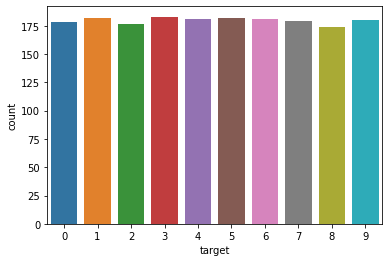

In [7]:
print('Los datos de deistribuyen de la siguiente manera')
sns.countplot(x='target', data=digits)

In [8]:
digits.describe()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [9]:
digits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

In [10]:
print('Podemos ver que los datos son de tipo entero, estamos usando 456.4 kb de memoria y no hay datos nulos')

Podemos ver que los datos son de tipo entero, estamos usando 456.4 kb de memoria y no hay datos nulos


C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated

C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pipek\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

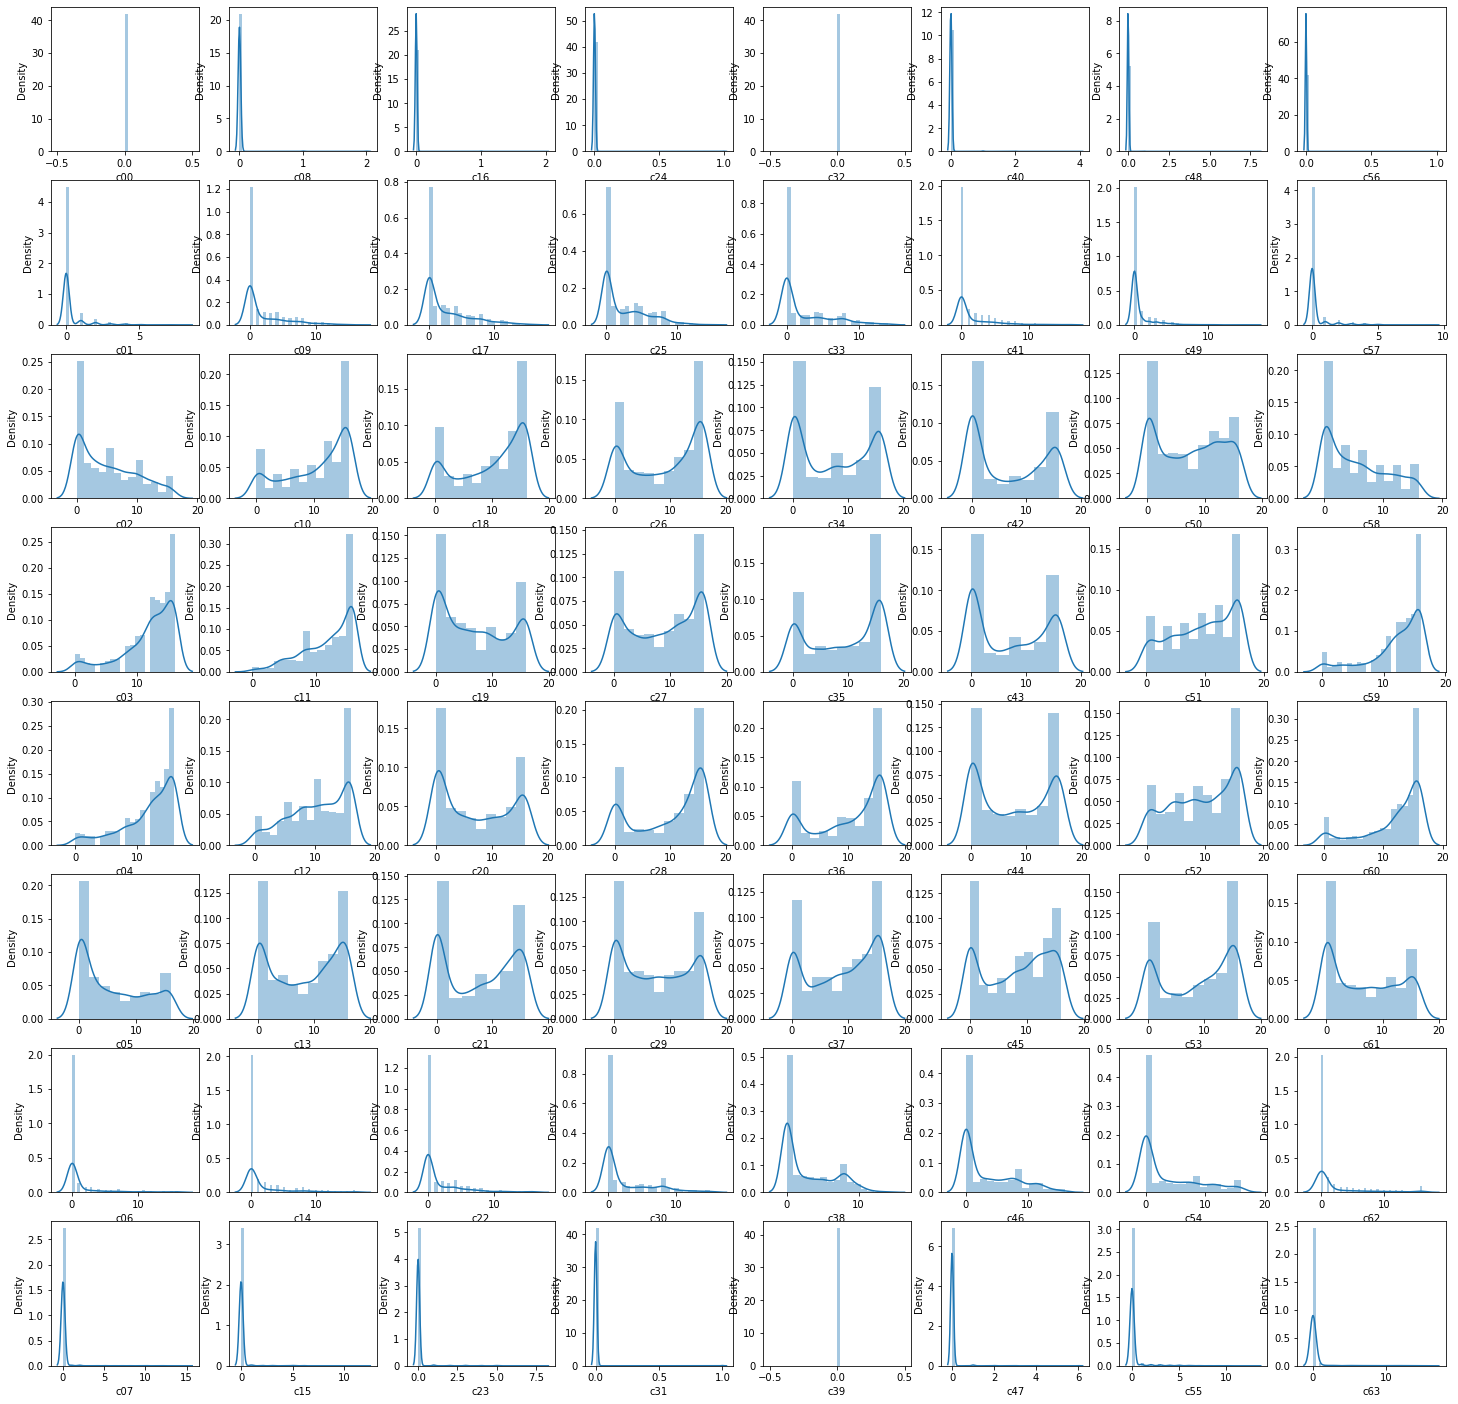

In [53]:
nx,ny = 8,8
columnas = digits.columns
i=0
fig, axs = plt.subplots(nx, ny, figsize=(25, 25))
for y in range(ny):
    for x in range(nx):
        sns.distplot(digits[columnas[i]], hist=True, rug=False, ax=axs[x,y],label = columnas[i])
        i+=1

In [55]:
print("Vemos que hay a lo menos 10 parametros que no son relevantes")

Vemos que hay a lo menos 10 parametros que no son relevantes


### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [11]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

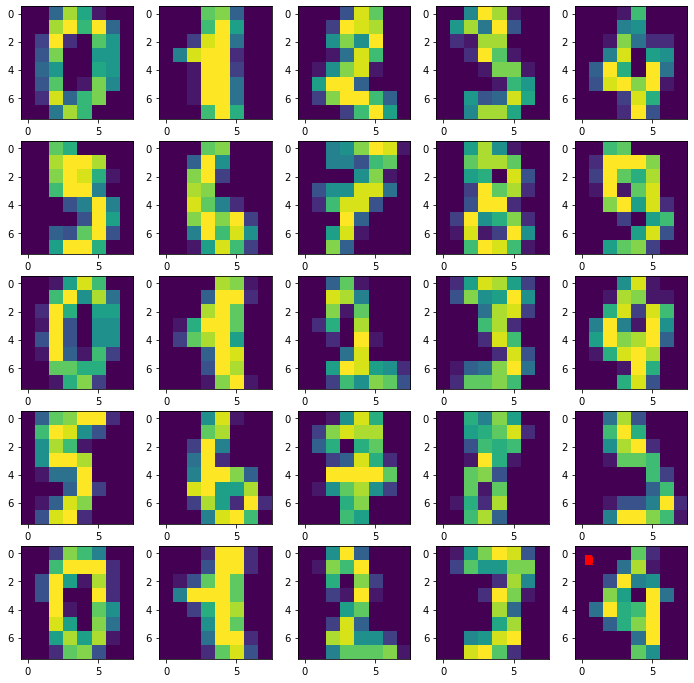

In [12]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
n=0
for i in range(5):
    for j in range(5):
        plt.text(0.5,0.5,digits_dict["target"][n],horizontalalignment='center', verticalalignment='center', fontsize=14, color='r')
        axs[i, j].imshow(digits_dict["images"][n])
        n=n+1

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time 

In [14]:
X = digits.drop(columns="target").values
y = digits["target"].values
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [15]:
print('Largo conjunto entrenamiento', y_train.shape[0])
print('Largo conjunto testeo', y_test.shape[0])

Largo conjunto entrenamiento 1347
Largo conjunto testeo 450


In [16]:
n_neighbors = 7
max_depth=5
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors).fit(X_train, y_train)
dtc = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)

In [17]:
y_true =  list(y_test)
lr_pred = list(lr.predict(X_test))
knn_pred = list(knn.predict(X_test))
dtc_pred = list(dtc.predict(X_test))

In [18]:
modelos=['lr', 'knn', 'dtc']
accuracy=[accuracy_score(y_true,lr_pred),accuracy_score(y_true,knn_pred),accuracy_score(y_true,dtc_pred)]
recall=[recall_score(y_true,lr_pred,average='weighted'), recall_score(y_true,knn_pred,average='weighted'), recall_score(y_true,dtc_pred,average='weighted')]
precision=[precision_score(y_true,lr_pred,average='weighted'),precision_score(y_true,knn_pred,average='weighted'),precision_score(y_true,dtc_pred,average='weighted')]
fscore=[f1_score(y_true,lr_pred,average='weighted'),f1_score(y_true,knn_pred,average='weighted'),f1_score(y_true,dtc_pred,average='weighted')]

Comparacion = pd.DataFrame({'Modelo': modelos, 'accuracy': accuracy,'recall': recall, 'precision':precision, 'f-score':fscore}, 
                  columns=['Modelo', 'accuracy','recall','precision','f-score'])
Comparacion

,Modelo,accuracy,recall,precision,f-score
0,lr,0.964444,0.964444,0.964996,0.964532
1,knn,0.980000,0.980000,0.981265,0.980117
2,dtc,0.668889,0.668889,0.712095,0.673482


In [19]:
#tiempo lr
tiempo_inicial = time() 
LogisticRegression(solver='liblinear').fit(X_train, y_train)
tiempo_final = time() 
t_lr = tiempo_final - tiempo_inicial 
#tiempo knn
tiempo_inicial = time() 
KNeighborsClassifier(n_neighbors).fit(X_train, y_train)
tiempo_final = time() 
t_knn = tiempo_final - tiempo_inicial 
#tiempo dtc
tiempo_inicial = time() 
DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
tiempo_final = time() 
t_dtc = tiempo_final - tiempo_inicial
#Agregar tiempos al dataframe
Comparacion['tiempo']=[t_lr,t_knn,t_dtc]   
Comparacion

,Modelo,accuracy,recall,precision,f-score,tiempo
0,lr,0.964444,0.964444,0.964996,0.964532,0.149012
1,knn,0.980000,0.980000,0.981265,0.980117,0.016001
2,dtc,0.668889,0.668889,0.712095,0.673482,0.008001


In [20]:
#Matriz de confusion lr
print('\nMatriz de confusion lr:\n ')
print(confusion_matrix(y_true,lr_pred))


Matriz de confusion lr:
 
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  1  0  0  0  0  0  0]
 [ 0  1 42  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  2  0  0  0  0]
 [ 0  1  0  0 48  0  0  1  0  0]
 [ 0  0  1  0  0 47  0  0  1  0]
 [ 0  0  0  0  2  0 50  0  0  0]
 [ 0  0  0  0  1  0  0 36  0  1]
 [ 0  1  0  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 48]]


In [21]:
#Matriz de confusion knn
print('\nMatriz de confusion knn:\n ')
print(confusion_matrix(y_true,knn_pred))


Matriz de confusion knn:
 
[[39  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  1 42  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  1  0  0  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 49  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  4  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  0  0  0  1 49]]


In [22]:
#Matriz de confusion dtc
print('\nMatriz de confusion dtc:\n ')
print(confusion_matrix(y_true,dtc_pred))


Matriz de confusion dtc:
 
[[35  0  0  0  3  0  1  0  0  0]
 [ 0 10  0  0  4  6  3  0 14  0]
 [ 0  3 35  2  0  1  0  0  2  0]
 [ 0  5  2 33  0  2  0  0  2  2]
 [ 0  1  0  0 32  1  8  2  3  3]
 [ 0  0  0  0  3 40  2  0  2  2]
 [ 0  0  1  0  2  2 47  0  0  0]
 [ 0  9  0  1  0  0  0 26  2  0]
 [ 0  9  7  1  0  0  0  0 28  0]
 [ 0  2  0  0  1  1  0  0 32 15]]


Vemos que el mejor modelo basado en sus metricas es knn, mientras que el que tiene mejor tiempo es dtc. Por ultimo el modelo que yo escogeria sería el modelo knn, debido a que es el que tiene mejor metrica y no tiene tanto tiempo de ejecución comparado con el resto.

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [43]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp

In [24]:
#intervalo de confianza
scores = cross_val_score(knn, X, y, cv=10)
print("Accuracy:",scores.mean())
print("Standard deviation:", scores.std())

Accuracy: 0.9677343265052762
Standard deviation: 0.019210181559251412


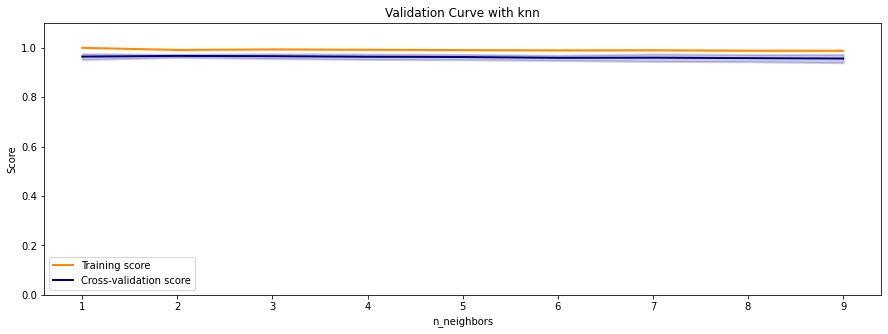

In [31]:
#Curva de validacion
param_range = np.arange(1, 10, 1)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(n_neighbors=5), X, y, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,5))
plt.title("Validation Curve with knn")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [45]:
#Curva AUC-ROC

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors))
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-52-9a867e3afff6>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


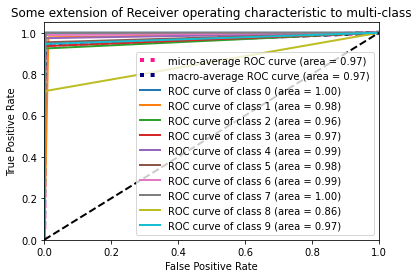

In [52]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

#plt.figure(figsize=(15,5))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


Del analisis de datos vimos que hay 10 parametros que no son relevantes

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [58]:
# Separamos las columnas objetivo
x_training = digits.drop(['target',], axis=1)
y_training = digits['target']

# Aplicando el algoritmo univariante de prueba F.
k = 64-10  # número de atributos a seleccionar
columnas = list(x_training.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(x_training, y_training)

C:\Users\pipek\Miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\pipek\Miniconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [59]:
catrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(catrib.nonzero()[0])]
atributos

['c01',
 'c02',
 'c03',
 'c04',
 'c05',
 'c06',
 'c07',
 'c09',
 'c10',
 'c11',
 'c12',
 'c13',
 'c14',
 'c15',
 'c17',
 'c18',
 'c19',
 'c20',
 'c21',
 'c22',
 'c23',
 'c25',
 'c26',
 'c27',
 'c28',
 'c29',
 'c30',
 'c33',
 'c34',
 'c35',
 'c36',
 'c37',
 'c38',
 'c41',
 'c42',
 'c43',
 'c44',
 'c45',
 'c46',
 'c47',
 'c49',
 'c50',
 'c51',
 'c52',
 'c53',
 'c54',
 'c55',
 'c57',
 'c58',
 'c59',
 'c60',
 'c61',
 'c62',
 'c63']

In [61]:
X = digits[atributos]
y = y_training
X_train, X_test, Y_train, Y_test = train_test_split(X , y, test_size=0.2, random_state = 2)
model = KNeighborsClassifier(n_neighbors)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

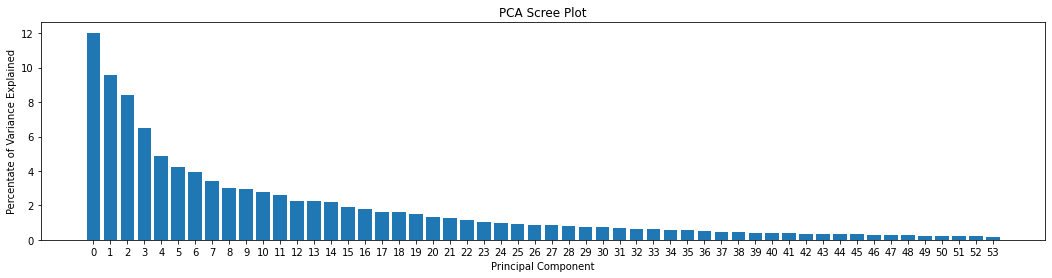

In [66]:
x = StandardScaler().fit_transform(x_training.values)
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = list(range(0,k))

plt.figure(figsize=(18,4))
plt.bar(x= range(0,k), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

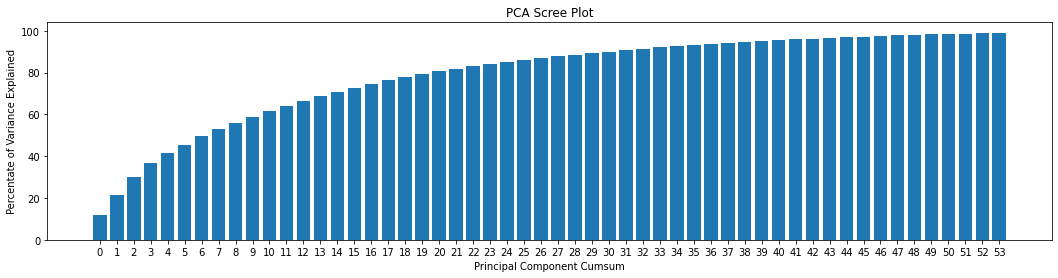

In [67]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)

plt.figure(figsize=(18,4))
plt.bar(x= range(0,k), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Vemos que dede el 21 tenemos mas del 80%

In [71]:
pca = PCA(n_components=21)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = range(0,21))
targetDataframe = digits[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,target
0,1.914216,-0.954486,-3.946058,2.028750,-0.267143,0.530748,-1.415632,1.495521,0.125660,-0.821087,...,0.225408,-0.203103,0.845780,0.101874,0.174379,-0.071224,0.424852,0.415815,0.420722,0
1,0.588968,0.924636,3.924761,-1.779879,-0.992670,-0.675872,1.878431,0.557193,1.079399,0.086655,...,-0.053613,-0.396437,-0.755341,-0.229109,-0.116894,-0.439059,0.543479,-0.084854,1.014392,1
2,1.302031,-0.317223,3.023402,-2.043514,-2.081332,0.934701,-1.294754,1.156740,0.784172,-1.097852,...,-0.563967,-0.982965,-1.182033,0.395187,-0.226470,-0.481822,-1.118470,-1.085165,-0.538872,2
3,-3.020753,-0.868756,-0.801764,-2.186956,-0.557080,0.727236,0.959284,-1.383796,0.259916,0.743371,...,-0.163079,1.006471,-0.127843,-0.979628,-0.940914,-0.390935,1.519288,0.300191,0.455962,3
4,4.528953,-1.093471,0.973099,-1.419471,-1.715171,1.431617,1.073178,-0.968576,-1.660476,1.174034,...,-0.344955,-0.115535,0.735484,0.212355,-0.099856,-0.553955,1.635685,1.076111,0.510019,4


In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(principalDataframe , targetDataframe, test_size=0.2, random_state = 2)
model = KNeighborsClassifier(n_neighbors)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)


<ipython-input-73-7b69922cac6c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train,Y_train)


In [74]:
modelos=['lr']
accuracy=[accuracy_score(y_true,lr_pred)]
recall=[recall_score(y_true,lr_pred,average='weighted')]
precision=[precision_score(y_true,lr_pred,average='weighted')]
fscore=[f1_score(y_true,lr_pred,average='weighted')]

metricas = pd.DataFrame({'Modelo': modelos, 'accuracy': accuracy,'recall': recall, 'precision':precision, 'f-score':fscore}, 
                  columns=['Modelo', 'accuracy','recall','precision','f-score'])
metricas

,Modelo,accuracy,recall,precision,f-score
0,lr,0.964444,0.964444,0.964996,0.964532


De lo que podemos ver que las metricas obtenidas son buenas.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [79]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    Y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos incorrectos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = np.array(y_pred)[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

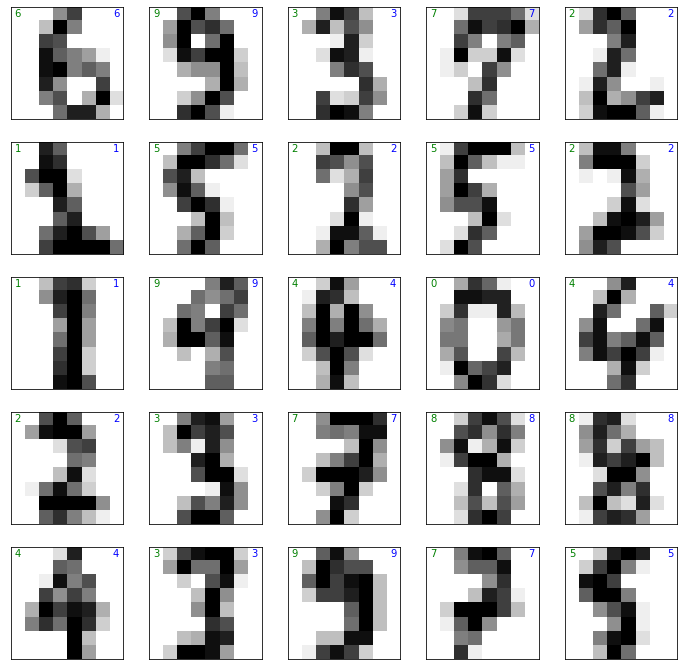

In [80]:
mostar_resultados(digits,KNeighborsClassifier(n_neighbors),nx=5, ny=5,label = "correctos")

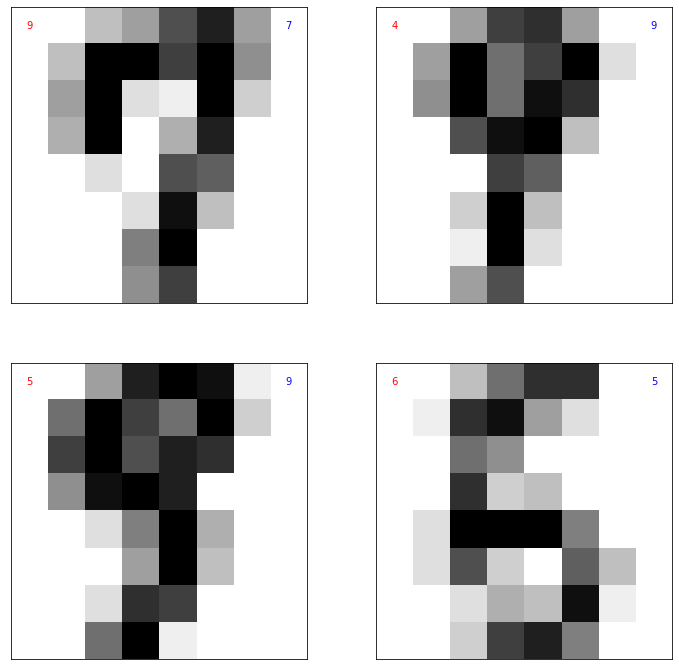

In [85]:
mostar_resultados(digits,KNeighborsClassifier(n_neighbors),nx=2, ny=2,label = "incorrectos")

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

El modelo kkn obtuvo buenos resultados, ajustandose de manera correcta y prediciendo bien obteniendo muy pocos errores comparado con la cantidad de datos. Unos trabajos futuros seria aplicar esto mismo pero con un dataset mas complicado de imagenes (ya que este dataset es simple pero practico para el aprendizaje). Otro posible trabajo seria probar distintos modelos o variar el numero de vecindades que se tomaron para knn, lo cual posiblemente podria traer aun mejores resultados. 